In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

In [16]:
# SET DATA
iris = datasets.load_iris()
data = iris.data[:, -2:]
tr = iris.target
tr_name = iris.target_names
cl = np.array(['red', 'green', 'blue'])
n_neighbors = np.array(range(1, len(data)))

In [17]:
def LOO(data, target):
    loo = LeaveOneOut()
    errors = np.zeros(len(data)-1)
    for train_index, test_index in loo.split(data):
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = tr[train_index], tr[test_index]
        for i in range(1, len(data)):
            classifier = KNeighborsClassifier(n_neighbors = i)
            classifier.fit(X_train, y_train)
            errors[i-1] += (classifier.predict(X_test) != y_test)[0] / len(data)
    return errors


In [18]:
errors = LOO(data, tr)
min_index = np.argmin(errors)
min_error = [min_index, errors[min_index]]

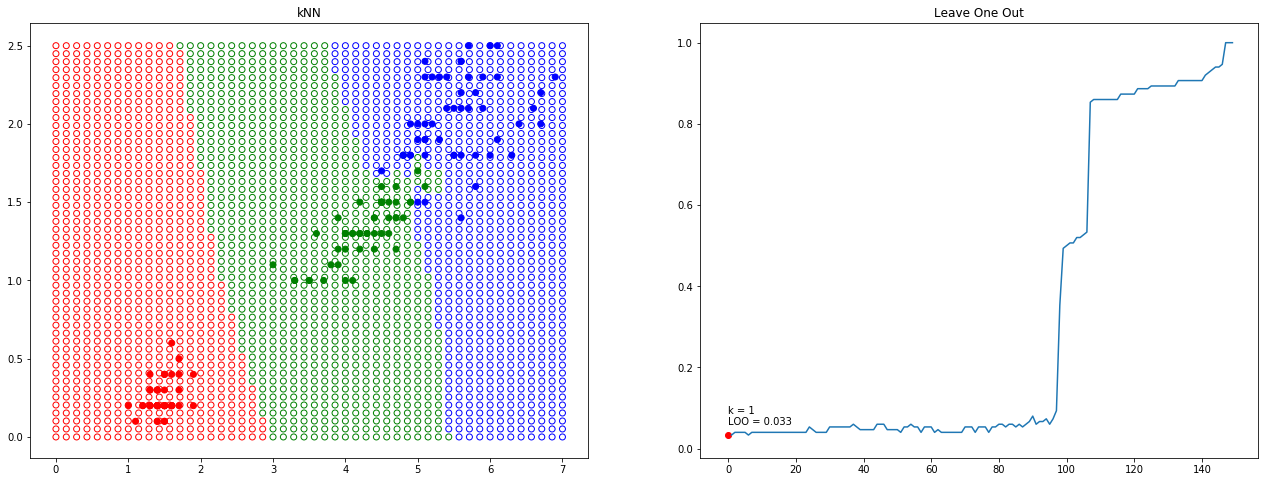

In [19]:
fig = plt.figure(figsize=(22,8))

ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

# 1st FIELD
x_min, x_max = 0, 7
y_min, y_max = 0, 2.5
classifier = KNeighborsClassifier(n_neighbors = min_index + 1)
classifier.fit(data, tr)

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

ax_1.set(title = 'kNN')
ax_1.scatter(xx, yy, edgecolors = cl[z], facecolors='none')
ax_1.scatter(data[:, 0], data[:, 1], color = cl[tr])

# 2nd FIELD
ax_2.set(title = 'Leave One Out')
ax_2.plot(n_neighbors, errors)
str_k = 'k = ' + str(min_index + 1) + '\nLOO = ' + str(round(errors[min_index], 3))
ax_2.annotate(s=str_k, xy=(min_error[0], min_error[1]), xytext=(0, 10), textcoords='offset points')
ax_2.scatter(min_error[0], min_error[1], color = 'red')

plt.show()